# Data Exploration

Contents:

- Overview of Data Exploration
- Summary statistics
- Visualization for Data Exploration

## Overview of Data Exploration

The goal of the data exploration is to *learn* the data. This means that the data scientist must understand the structure of the available data as well as the values of the data. At the end, the data scientist knows the basic characteristics of the data, e.g., the structure, the size, the completeness (or rather where data is missing), and the relationships between different parts of the data. 

There are many methods for data exploration. The exploration is usually a semi-automated interactive process in which data scientists use many different tools to consider different aspects of the data. The first element of the toolbox of a data scientist are simple text editors and command line tools like head, more, and less. These tools allow the data scientist to inspect the non-binary raw data, e.g., comma-separated values (CSV):

In [1]:
!head 03_Data-Exploration.ipynb

{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# Data Exploration\n",
    "\n",
    "Contents:\n",
    "\n",


From this, we learn that the ipynb format used by Jupyter notebooks uses the [JavaScript Object Notation (JSON)](https://www.json.org/) to store data as a list of cells, that have a type, metadata, and associated source code. Without any additional tools, just through the simple head command that list the first lines of a text file.

> **Note:**
>
> You can run any shell command (e.g., bash) if you prefix the name with an exclamation mark directly from a Jupyter Notebook. Thus, `!head` in a Jupyter Notebook is the same as typing `head` in the command line. Whether this works or not depends on the command line. Since the standard command line of Windows does not have a `head` command, this may not work. 

Of course, this is not the only why to learn about how the data stored by Jupyter Notebooks. It is also not clear if all information (e.g., allowed fields) is visible, because the current file may not use all possible features of the ipynb format. Therefore, it is also important to look at the metadata, in this case the [description of the format](https://nbformat.readthedocs.io/en/latest/format_description.html). This is much more detailed and contains all aspects of the format. 

The metadata is not only restricted to file formats, but also other aspects, e.g., where data in a column of a relation database comes from (i.e., the source of the data), where related information may be found, and other useful information about the data. What the metadata does not contain (except maybe example values) is information about the values in your dataset. However, learning about these values is also vital to understand how a good model for your use case, based on the data, may look like. In the following, we look at two commonly used methods for learning about the values of data, i.e., summary statistics and visualizations. 

## Descriptive Statistics

*Descriptive* statistics try to summarize data in single values that describe properties of the data. This is not to be mixed up with *inductive* statistics, that allows the prediction of properties of the data. Consequently, you cannot use descriptive statistics to create reliable forecasts of the data. 

Within this chapter, we cover the following descriptive statistics:

- The *central tendency* of data, described by the *arithmetic mean*, *median*, or *mode*.
- The *variability* of the data, described by the *standard deviation* or *interquartile range*. 
- The *range* of the data, described by the *min* and *max* value.

There are also other descriptive statistics for the properties above, that we do not discuss in this chapter, e.g., the *trimmed mean* and the *harmonic mean* for the central tendency, or the *median absolute deviation of the median* for the variability. Moreover, there are also descriptive statistics for other properties of the data, e.g., for the *shape* (kurtosis, skewness). However, these are out of scope of this chapter and you can mostly do without them, especially if you combine descriptive statistics with visualizations. 

We use the notation $x = {x_1, ..., x_n}$ with $x_1, ..., x_n \in \mathbb{R}$ in this section. This means that $x$ is a set of real valued numbers. If $x$ is only a subset of all possibly data, $x$ is called a *sample*. 

### Central Tendency

The central tendency of data is a statistical marker that should be for a *typical value* in the center of the data, i.e., in the middle. This does not mean that many data points will have that exact value. Instead, the central tendency marks the "middle" of the data, i.e., it central location. For comparison, consider cities. They also have a center, which is typically somewhere in the middle of the city. 

There are different ways to measure the central tendency of the data. The *arithmetic mean* is defined as 
$$mean(x) = \frac{1}{n}\sum_{i=1}^{n} x_i, x_i \in \mathbb{R}.$$

The arithmetic mean can also easily be described in the natural language. It is the sum of all values divided by the number of values. The arithmetic mean is a good choice to describe the central tendency of data that follows a normal or a uniform distribution. In general, the arithmetic mean works reasonable well as long as the data is 1) without "holes, i.e., without large intermittent regions without values, including outliers, and 2) the is symmetric around the the arithmetic mean, i.e., the *spread* of the data on the left and the right side of the mean is similar. Thus, the arithmetic mean only works well is assumptions on the distribution of the data are met. Statistical methods that make such assumptions are called *parametric* statistics and may be misleading in case the assumptions are not fulfilled. We will show examples that demonstrate how the mean value can be misleading through [Anscombe's quartet](#anscombe's-quartet).

An alternative to the mean value is the *median* which is defined as
$$median(x) = \cases{\bar{x}_{m+1} & if $n$ is odd with $m=\frac{n+1}{2}$ \\ \frac{1}{2}(\bar{x}_{m}+\bar{x}_{m+1}) & if $n$ is even with $m=\frac{n}{2}$}$$

where $\bar{x}$ are the values of $x$ sorted by their size. Thus, the median is the middle value in the data: 50% of the data is less than or equal to the median, 50% of the median is greater than or equal to the median. The median is a *non-parametric* statistic, i.e., the median works for any distribution of data. Thus, the median can be used instead of the arithmetic mean if the assumptions on the distribution for the arithmetic mean to be meaningful are not met. 

What it means that the median is more robust than the median can be shown using a simple example. Consider the arithmetic mean and median of the following data, that fulfills the assumption of the arithmetic mean:

In [2]:
import statistics  # we use the statistics from the Python standard library

data = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

print('mean:  ', statistics.mean(data))
print('median:', statistics.median(data))

mean:   7.500909090909091
median: 7.58


Both values are relatively similar, both represent the central tendency of the data well. Now we add a single very large outlier to the data.

In [3]:
data.append(100)
print('mean:  ', statistics.mean(data))
print('median:', statistics.median(data))

mean:   15.209166666666667
median: 7.81


The arithmetic mean is now a lot higher and actually larger than all but one data point. This is not a good representation of the central tendency of the data. The median did not change a lot and remains almost the same. This is because the median only skips to the next sorted value, which is robust against such outliers. 

You might ask yourself why you should use the arithmetic mean at all, if the median is apparently superior because it is more robust. The biggest reason for this comes from stochastics: the arithmetic mean is closely related to the expected value of random variables. Moreover, the normal distribution can be fully described by the mean value and the standard deviation. Thus, for normally distributed data, the mean value is actually the perfect estimate for the central tendency. Regardless, if you are unsure about the distribution of the data and fear that there might by outliers, it is saver to use the median instead of the arithmetic mean. 

The arithmetic mean and the median can only be used for numeric data. However, what if you have, e.g., data about cloth sizes? These are not numeric values, but rather something like "small", "medium", and "large". Such data is categorical data and further discussed in Chapter 4. The *mode* can be used to calculate the central tendency of such data. The mode is defined as
the value that occurs most often in a sample $x$.

In [4]:
data = ['small', 'medium', 'small', 'large', 'large', 'medium', 'medium']
print('mode:', statistics.mode(data))

mode: medium


Please note that while the mode may work well for categorical data or discrete numeric data, it can also be misleading if the data is *bimodal* or *multimodal*, i.e., data where multiple values are all occurring frequently. The extreme case would be data where the categories are uniformly distributed. Because each category is equally likely, the mode would be completely random. Moreover, the mode does not work for continuous numeric data, because here it is very unlikely that the same value occurs twice. 

### Variability

The variability measures how far the data is spread out. A small variability means that most data is close to the central tendency of the data. A high variability means that the data is spread out over a large range. 

The most common measure for the variability is the *standard deviation*, which is defined as
$$sd(x) = \sqrt{\frac{\sum_{i=1}^n |x_i-mean(x)|}{n-1}}.$$

The standard deviation is the square root of the arithmetic mean of the difference from the arithmetic mean, except that the division is by $n-1$ instead of $n$. This is due to something called *degrees of freedom*, which we do not discuss here further. Thus, the standard deviation tells us how much deviation from the mean value we can expect. The standard deviation works well as a measure for the variability, when the mean value is a suitable representation for the central tendency. This means that the standard deviation is also a *parametric* measure for the variability, that can also be misleading.

Same as the median is the non-parametric counterpart to the arithmetic mean, there are also non-parametric statistics for the variability. The *interquartile range* is defined as
$$IQR(X) = Q_{upper}-Q_{lower}$$
where $Q_{upper}$ is the upper quartile and $Q_{lower}$ is the lower quartile. The upper quartile and lower quartile are defined analogously to the median, but with 75% and 25% of the data. This means that for the upper quartile, 75% of the data are less than or equal to $Q_{upper}$ and 25% are greater than or equal to $Q_{upper}$. For the lower quartile, 25% of the data are less than or equal to $Q_{lower}$ and 75% of the the data are greater than or equal to $Q_{lower}$. It follows that at least 50% of the data is within the interquartile range. 

In general, you should not use the standard deviation, when you use the median. Below is the example we already used to demonstrate that the arithmetic mean is not robust with respect to outliers. 

In [5]:
from scipy import stats  # we use scipy for the IQR

data = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
print('Without outlier')
print('sd: ', statistics.stdev(data))
print('IQR:', stats.iqr(data))

data.append(100)
print('With outlier')
print('mean:  ', statistics.stdev(data))
print('median:', stats.iqr(data))

Without outlier
sd:  2.031568135925815
IQR: 2.255000000000001
With outlier
mean:   26.77235292350312
median: 2.465


Regardless, if the assumptions for the standard deviation are fulfilled, this is a very good measure for the variability of data. Same as for the mean value, this is especially true for normally distributed data. Together with the mean value, the standard deviation describes the normal distribution. For the normal distribution it can be shown that 68% is no more than one standard equation away from the arithmetic mean, 95% of the data is within two standard deviations of the mean, and 99.7 percent is within 3 standard deviations of the mean. This is also known as the 68-95-99.7 rule. A weaker statement is also possible for other distributions. Chebychev's inequality holds for all distributions with a finite expected value (can be thought of here as arithmetic mean) and finite non-zero variance (the variance is the square of the standard deviation). It follows from Chebychev's inequality that 50% of the data is no more than $\sqrt{2} \cdot std$ away from the expected arithmetic mean. 

### Range

The range of data describes which values can possibly be observed. For numeric data, this is defined by the minimum, i.e., the smallest observable value and the maximum, i.e., the largest observable value. Both can easily be estimated from data by simply defining the range as the the interval between the minimal *observed* value and the maximal *observed* value. 

The range may sound trivial as statistical markers. However, the range is a surprisingly powerful tool to identify simple problems in the data, that may be hidden by other descriptive statistics we described above. Especially invalid data that is outside a reasonable range can be easily seen. For example, if you have the age in years, and observe a minimum value of -1 this is implausible and indicates that this may be a missing value. If you have a maximum of 130 years, this is also not possible because there is nobody lived that long (so far). Since both problems would be relatively close to real values, i.e., not outliers, this would likely not be detected by analyzing the central tendency and the variability. 

## Visualization for Data Exploration

Visualization is a powerful tool to learn about and understand data. 

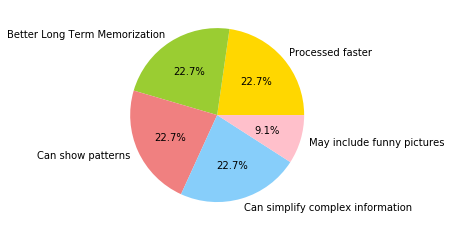

In [6]:
# we use matplotlib for the creation of visualizations
import matplotlib.pyplot as plt
%matplotlib inline

# Data to plot
labels = ['Processed faster', 'Better Long Term Memorization',
          'Can show patterns', 'Can simplify complex information',
          'May include funny pictures']
sizes = [25, 25, 25, 25, 10]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink']

# Plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

There are several advantages of visulization in comparison to other forms of showing data, e.g., tables and descriptive statistics. In general, we are faster at processing visual information. Thus, we can understand more about data in the same amount of time. Moreover, most people are better at memorizing visual information than, e.g., text. From personal anecdotocal and certainly that was certainly not obtained using any scientific method, I believe this is certainly true for the students. In exams, I have seen many solutions where the shape of a diagram was correctly drawn from memory, but the annotations, i.e., the associated textual data was wrong or missing. 

However, the advantages of visualizations go beyond processing speed and memorization. Visualization may also lead to understand that would otherwise be very hard to obtain, e.g., about patterns within data of complex relationships. 

Consider the following example. Alice knows Bob and Dan, Dan knows Bob, Bob knows Carol and Alice, Carol knows Alice, Bob, and Dan. The prior sentence is quite complex, hard to follow, and you do not get an intuitive understand of the relationship between Alice and Bob. Now the sentence as a visualization using a directed graph.

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


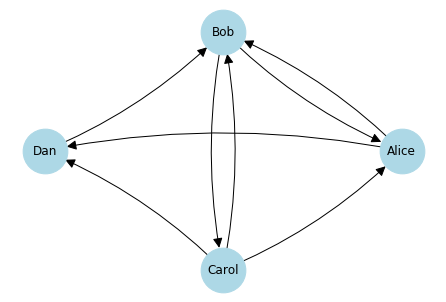

In [7]:
import networkx as nx  # networkx is a powerful library for working with graphs

# Create the graph
graph = nx.DiGraph()
graph.add_edge('Alice', 'Bob')
graph.add_edge('Alice', 'Dan')
graph.add_edge('Dan', 'Bob')
graph.add_edge('Bob', 'Carol')
graph.add_edge('Bob', 'Alice')
graph.add_edge('Carol', 'Alice')
graph.add_edge('Carol', 'Bob')
graph.add_edge('Carol', 'Dan')

# Plot the graph with a shell layout
nx.draw_shell(graph, with_labels=True, node_size=2000, node_color='lightblue',
              arrowsize=20, connectionstyle='arc3, rad = 0.1')

The graph is easy to read and gives us an intuitive understanding of the relationship between the four actors. Please note that for this - and all other graphs in this chapter - we leave out legends, detailed styling, etc. Instead, we create the graphs with minimal code such that they allow us to get the insights we want. This is because we consider visualization as a tool for data exploration. If we would consider visualization in general, especially how you should create graphs that should be used in written text (books, scientific publications, student thesis), other aspects would also be relevant, e.g., consistent font types and sizes, consistent coloring, legends, and titles.

### Anscombe's Quartet

Anscombe's quartet is a famous example for how statistical values may be misleading. The example is based on four different sets of data $(x_1, y_1), ..., (x_4, y_4)$ where with 11 values and for two variables $x_i$ and $y_i$, $i=1, ..., 4$. When we look at the data with descriptive statistics, they look very similar. 

In [16]:
import numpy as np  # we now also need numpy, the commonly used numerics libarary for Python

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]) # same for x1, x2, and x3
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96,
               7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26,
               8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81,
               8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04,
               5.25, 12.50, 5.56, 7.91, 6.89])


print('arithmetic mean of x (same for x1, x2, x3), x4')
print(statistics.mean(x))
print(statistics.mean(x4))

print('standard deviation of x (same for x1, x2, x3), x4')
print(statistics.stdev(x))
print(statistics.stdev(x4))

print('arithmetic mean of y1, ..., y4')
print(statistics.mean(y1))
print(statistics.mean(y2))
print(statistics.mean(y3))
print(statistics.mean(y4))

print('standard deviation of y1, ..., y4')
print(statistics.stdev(y1))
print(statistics.stdev(y2))
print(statistics.stdev(y3))
print(statistics.stdev(y4))

arithmetic mean of x (same for x1, x2, x3), x4
9
9
standard deviation of x (same for x1, x2, x3), x4
3.3166247903554
3.3166247903554
arithmetic mean of y1, ..., y4
7.500909090909091
7.500909090909091
7.5
7.500909090909091
standard deviation of y1, ..., y4
2.031568135925815
2.0316567355016177
2.030423601123667
2.0305785113876023


The data even shares more similarities. If we were to fit a linear regression (Chapter 8) of $y_i$ using $x_i$, we would always find the same regression line, i.e. $y=3+0.5\cdot x$. Thus, from a statistical point of view the four data sets may be interpreted as similar. However, when we visualize the data with a simple pair-plot, we see that this is not the case. 

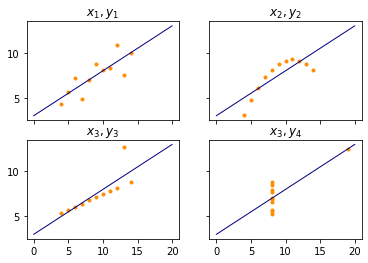

In [23]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True)
axes[0, 0].plot(x, y1, color='darkorange', marker='.', linestyle='none')
axes[0, 0].plot(xfit, yfit, color='navy', lw=1)
axes[0, 0].set_title('$x_1, y_1$')
axes[0, 1].plot(x, y2, color='darkorange', marker='.', linestyle='none')
axes[0, 1].plot(xfit, yfit, color='navy', lw=1)
axes[0, 1].set_title('$x_2, y_2$')
axes[1, 0].plot(x, y3, color='darkorange', marker='.', linestyle='none')
axes[1, 0].plot(xfit, yfit, color='navy', lw=1)
axes[1, 0].set_title('$x_3, y_3$')
axes[1, 1].plot(x4, y4, color='darkorange', marker='.', linestyle='none')
axes[1, 1].plot(xfit, yfit, color='navy', lw=1)
axes[1, 1].set_title('$x_4, y_4$')
plt.show()

The orange points show the location of the data, the blue line shows the regression line for $y=3+0.5\cdot x$ which is optimal for the data. From the statistics, one may expect the data to look like $x_1$, $y_1$, i.e., data with a fairly linear relationship. This means that both $x_1$ and $y_1$ change relatively regularly in form of a line. How how the statistics can be misleading, as they may also be the result for other data. The pair $x_2$, $y_2$ shows something that looks a lot like an inverse parabola. The pair $x_3$, $y_3$ is actually perfectly linear, but with one outlier which skews the regression line. The pair $x_4$, $y_4$ is even worse. $x_4$ is actually constant with one exception. 

The example demonstrates how descriptive statistics about data can be misleading and should be used with care. However, the more statistical markers are used, the less likely it is that the results are misleading. The critical reader may also complain that at least $y_3$ and $x_4$ have outliers and that the arithmetic mean and the standard deviations are not good criteria anyways. However, the problem is generic can there are many more examples, also for more statistical markers, as the work by [Matejka and Fitzmaurice](https://doi.org/10.1145/3025453.3025912) demonstrates. 

### Exploration of Single Features

The basic analysis of data is that of the distribution of single features within your data to understand how the values of the feature are distributed, similar to the analysis of single features with descriptive statistics. In the following, we will do this for a features from the [Boston housing data](), a dataset about house prices in Boston from that was initially published in 1978. We can load the data and the description of the data directly with scikit-learn.

In [35]:
from sklearn import datasets

boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The above description is an example of metadata, in this case the documentation of the data we are using. We now take a closer look at the feature *MEDV*, the median value of owner-occupied homes in $1000's. Histogram are a simple and effective way to learn about the distribution of data.

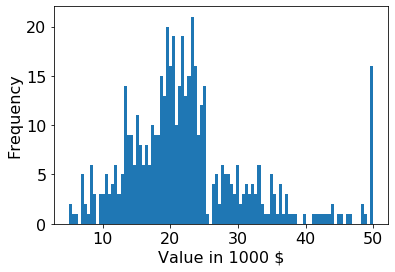

In [39]:
plt.figure()
plt.hist(y, bins=100)
plt.xlabel('Value in 1000 $')
plt.ylabel('Frequency')
plt.show()

The histogram visualizes how much data is in each region of the data. For this, *bins* are created and the histogram shows how many instance are in each bin. The above example shows the how many instance are in each of the 100 bins. The histogram tells us a lot about the data. 

- The values less than 30 seem to follow data seems to follow a normal distribution. This is indicated by the bell-shape of the histogram. The mean value of this normal distribution is somewhere around 22. This can be estimated by look at there the peak of the histogram is located, i.e., where the most values are. The standard deviation is likely somewhere between 7 and 11. Such a rough estimate of the standard deviation can be obtained using the 68-95-99.7 we discussed [above](#Variability). 
- A lot of values are at the at the largest bin on the right side of the plot, i.e., exactly at 50. This indicates that all values larger than 50 were set to exactly 50. Thus, while the numeric value is 50, the actual meaning is greater or equal to 50. 

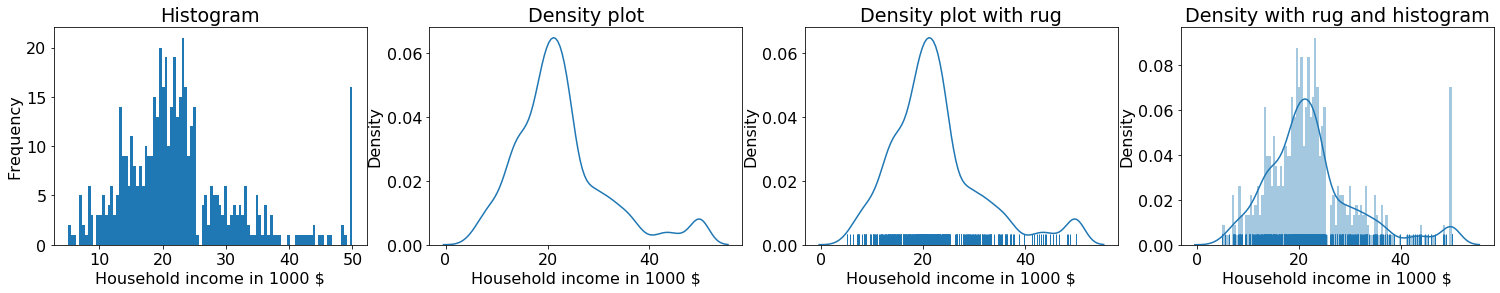

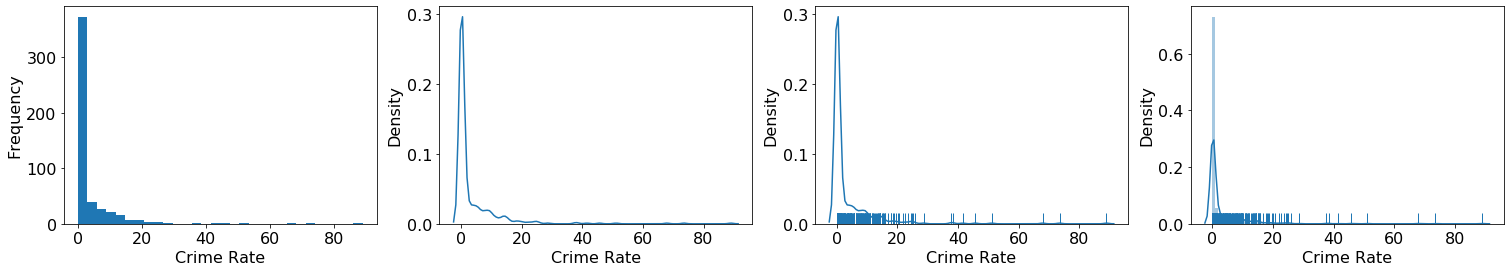

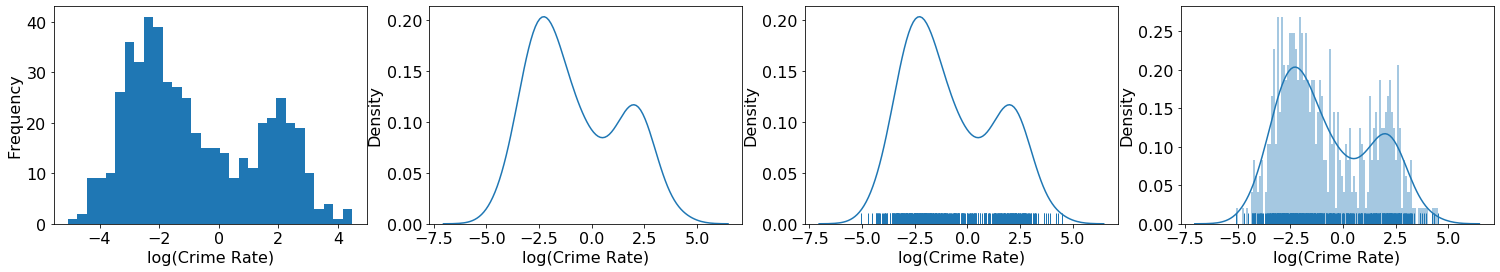

In [25]:
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

# Import some data to play with
boston = datasets.load_boston()
X = boston.data
y = boston.target

plt.figure
plt.hist(y, bins=100)
plt.xlabel('Household income in 1000 $')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.subplot(1,4,2)
sns.distplot(y, hist=False, rug=False)
plt.xlabel('Household income in 1000 $')
plt.ylabel('Density')
plt.title('Density plot')

plt.subplot(1,4,3)
sns.distplot(y, hist=False, rug=True)
plt.xlabel('Household income in 1000 $')
plt.ylabel('Density')
plt.title('Density plot with rug')

plt.subplot(1,4,4)
sns.distplot(y, bins=100, rug=True)
plt.xlabel('Household income in 1000 $')
plt.ylabel('Density')
plt.title('Density with rug and histogram')
plt.show()

plt.figure(figsize=(20, 4))
plt.subplots_adjust(left=-0.1)
plt.subplot(1,4,1)
plt.hist(X[:,0], bins=30)
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')

plt.subplot(1,4,2)
sns.distplot(X[:,0], hist=False, rug=False)
plt.xlabel('Crime Rate')
plt.ylabel('Density')

plt.subplot(1,4,3)
sns.distplot(X[:,0], hist=False, rug=True)
plt.xlabel('Crime Rate')
plt.ylabel('Density')

plt.subplot(1,4,4)
sns.distplot(X[:,0], bins=100, rug=True)
plt.xlabel('Crime Rate')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(20, 4))
plt.subplots_adjust(left=-0.1)
plt.subplot(1,4,1)
plt.hist(np.log(X[:,0]), bins=30)
plt.xlabel('log(Crime Rate)')
plt.ylabel('Frequency')

plt.subplot(1,4,2)
sns.distplot(np.log(X[:,0]), hist=False, rug=False)
plt.xlabel('log(Crime Rate)')
plt.ylabel('Density')

plt.subplot(1,4,3)
sns.distplot(np.log(X[:,0]), hist=False, rug=True)
plt.xlabel('log(Crime Rate)')
plt.ylabel('Density')

plt.subplot(1,4,4)
sns.distplot(np.log(X[:,0]), bins=100, rug=True)
plt.xlabel('log(Crime Rate)')
plt.ylabel('Density')
plt.show()
